In [3]:
# previous seminar was about numpy
import numpy

# today we learn about pandas
import pandas

## Plotting in Jupyter with matplotlib

below we use a **magic function**. It is a term!


In [4]:
import matplotlib.pyplot as plt
# magic says: activate matplotlib, show plots inline
%matplotlib inline 


In [5]:
x = numpy.array([-3, -1.5, 0, 1, 3, 4])

print (x)
print (x ** 2) # squared each element

[-3.  -1.5  0.   1.   3.   4. ]
[ 9.    2.25  0.    1.    9.   16.  ]


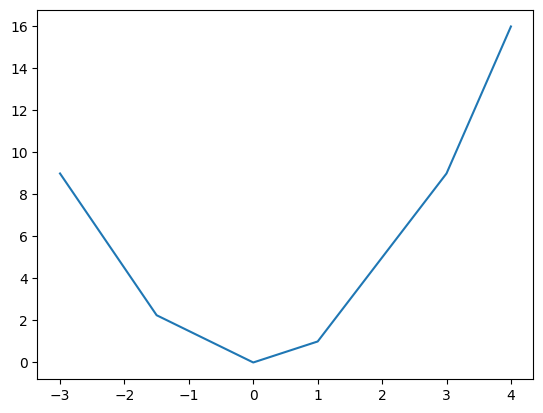

In [6]:
plt.plot(x, x ** 2)

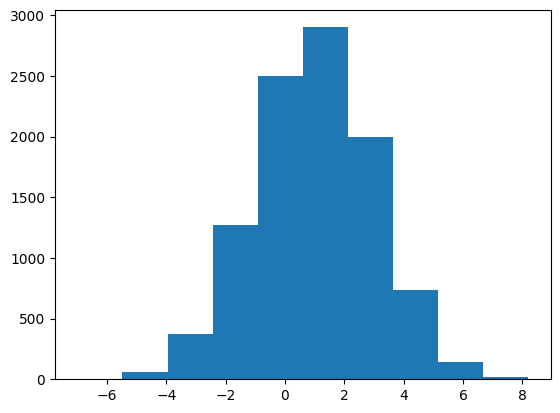

In [7]:
distribution = numpy.random.normal(loc=1., scale=2, size=10000)
plt.hist(distribution)
pass # it is the way to suppress printing output of last line. pass = 'do nothing'

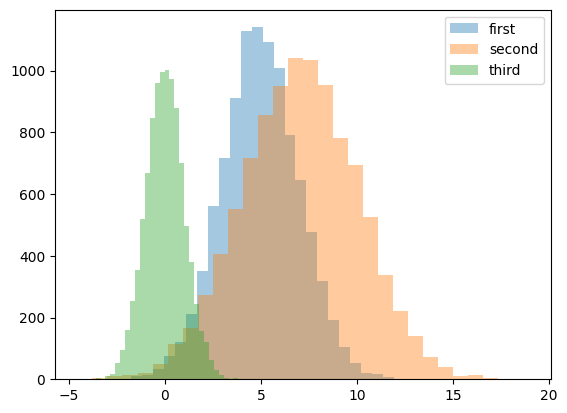

In [8]:
plt.hist(numpy.random.normal(loc=5., scale=2, size=10000), bins=30, alpha=0.4,  label='first')
plt.hist(numpy.random.normal(loc=7., scale=3, size=10000), bins=30, alpha=0.4,  label='second')
plt.hist(numpy.random.normal(loc=0., scale=1, size=10000), bins=30, alpha=0.4,  label='third')
plt.legend()
pass

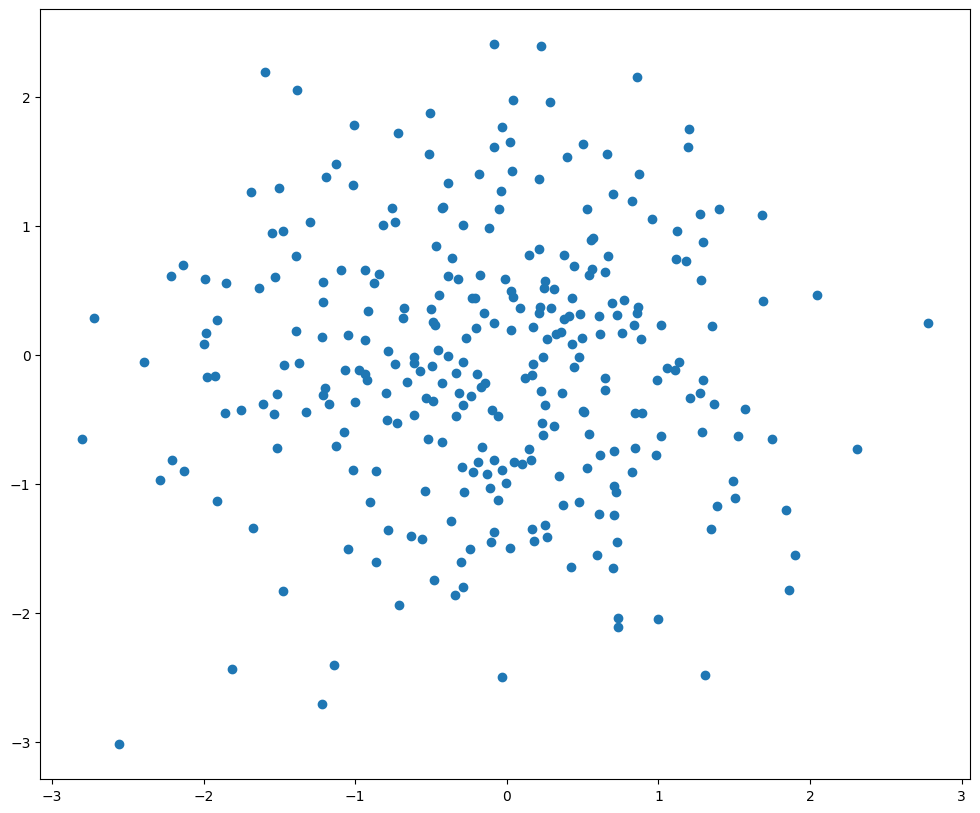

In [9]:
# Large scatter plot
plt.figure(figsize=[12, 10])
plt.scatter(numpy.random.normal(size=300), numpy.random.normal(size=300))

## Magics

magics are not needed so far, those are just for the information

In [10]:
# sample two arrays of random numbers sampled from uniform [0, 1]
a = numpy.random.random(size=1000000)
%time b = numpy.random.random(size=1000000)
# measure time needed for operation
%time result = a + b

CPU times: user 5.37 ms, sys: 4.55 ms, total: 9.92 ms
Wall time: 9.93 ms
CPU times: user 2.57 ms, sys: 0 ns, total: 2.57 ms
Wall time: 2.38 ms


In [11]:
%%time
# measure the time needed to run whole cell (%%, not %)
a = numpy.random.random(size=1000000)
b = numpy.random.random(size=1000000)
result = a + b

CPU times: user 26 ms, sys: 3.19 ms, total: 29.2 ms
Wall time: 27.6 ms


In [12]:
%%prun 
# profiling of complex code
numpy.histogram(x)

         76 function calls (68 primitive calls) in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 histograms.py:678(histogram)
        1    0.000    0.000    0.000    0.000 function_base.py:23(linspace)
      9/1    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        3    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        2    0.000    0.000    0.000    0.000 histograms.py:334(_unsigned_subtract)
        1    0.000    0.000    0.000    0.000 histograms.py:304(_get_outer_edges)
        1    0.000    0.000    0.000    0.000 histograms.py:360(_get_bin_edges)
        1    0.000    0.000    0.000    0.000 histograms.py:283(_ravel_and_check_weights)
        4    0.000    0.000    0.000    0.000 {method 'astyp

In [13]:
# general info about magics in Jupyter
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

# Hello Pandas

Looking at the data

In [14]:
!head data/2-winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


In [15]:
data = pandas.read_csv('data/2-winequality-white.csv', sep=';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [16]:
# split into description and target
y = data['quality']
X = data.drop('quality', axis=1)

In [17]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


## Operations on data with pandas

In [18]:
#leaving only 8 rows for testing
test_frame = data[:8].copy()

In [19]:
test_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6


In [20]:
test_frame['density']

0    1.0010
1    0.9940
2    0.9951
3    0.9956
4    0.9956
5    0.9951
6    0.9949
7    1.0010
Name: density, dtype: float64

In [21]:
# converting to numpy.array with .values
test_frame['density'].values

array([1.001 , 0.994 , 0.9951, 0.9956, 0.9956, 0.9951, 0.9949, 1.001 ])

In [22]:
test_frame['fixed acidity'][:5]

0    7.0
1    6.3
2    8.1
3    7.2
4    7.2
Name: fixed acidity, dtype: float64

In [23]:
# indexing with numbers - iloc
test_frame.iloc[[0, 4, 7], 2:7]

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
0,0.36,20.7,0.045,45.0,170.0
4,0.32,8.5,0.058,47.0,186.0
7,0.36,20.7,0.045,45.0,170.0


In [24]:
# indexing with named labels - loc
test_frame.loc[:, ['volatile acidity', 'fixed acidity']]

,volatile acidity,fixed acidity
0,0.27,7.0
1,0.30,6.3
2,0.28,8.1
3,0.23,7.2
4,0.23,7.2
5,0.28,8.1
6,0.32,6.2
7,0.27,7.0


In [25]:
# shortcut for previous
test_frame[['volatile acidity', 'fixed acidity']]

,volatile acidity,fixed acidity
0,0.27,7.0
1,0.30,6.3
2,0.28,8.1
3,0.23,7.2
4,0.23,7.2
5,0.28,8.1
6,0.32,6.2
7,0.27,7.0


In [26]:
# [start:end:step], some of arguments can be omitted.
test_frame.iloc[::3, ::-1]

,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
0,6,8.8,0.45,3.00,1.0010,170.0,45.0,0.045,20.7,0.36,0.27,7.0
3,6,9.9,0.40,3.19,0.9956,186.0,47.0,0.058,8.5,0.32,0.23,7.2
6,6,9.6,0.47,3.18,0.9949,136.0,30.0,0.045,7.0,0.16,0.32,6.2


In [27]:
# adding new feature with vector operation
test_frame['dioxide sum'] = test_frame['total sulfur dioxide'] + test_frame['free sulfur dioxide']
test_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,dioxide sum
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,215.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,146.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,127.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,233.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,233.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,127.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,166.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,215.0


In [28]:
# filtering dataset
filtered_data = data[data['density'] < 0.988]
filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2945,4.9,0.330,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.00,8
3367,6.0,0.290,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.20,6
3370,6.0,0.290,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.20,6
3673,5.4,0.300,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.60,7
3676,5.3,0.300,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.60,7
3710,4.7,0.670,0.09,1.0,0.020,5.0,9.0,0.98722,3.30,0.34,13.60,5
3773,5.0,0.610,0.12,1.3,0.009,65.0,100.0,0.98740,3.26,0.37,13.50,5
3904,5.0,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7
3915,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7
3918,6.4,0.350,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7


In [30]:
print len(test_frame)
print test_frame.shape 
print test_frame.columns

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (2785020035.py, line 1)

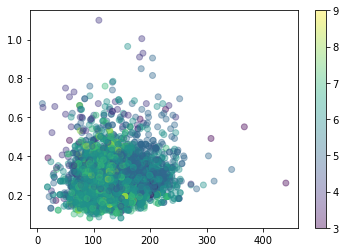

In [ ]:
plt.scatter(X['total sulfur dioxide'], X['volatile acidity'], c=y, alpha=0.4)
plt.colorbar()

## Homework

### Problem 1
plot histograms couple of features from the dataframe

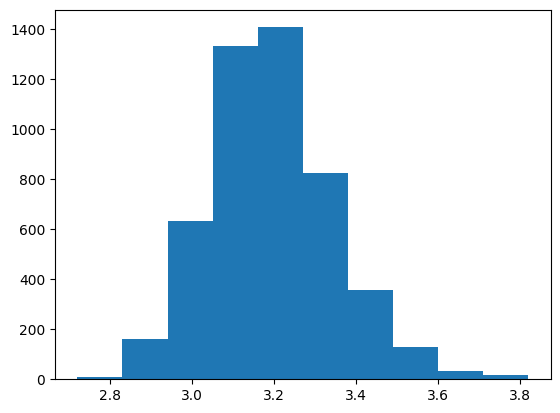

In [38]:
test1=data.copy()
plt.hist(test1['pH'].values)
pass

(array([ 37., 808., 969., 761., 765., 625., 427., 368., 110.,  28.]),
 array([ 8.  ,  8.62,  9.24,  9.86, 10.48, 11.1 , 11.72, 12.34, 12.96,
        13.58, 14.2 ]),
 <BarContainer object of 10 artists>)

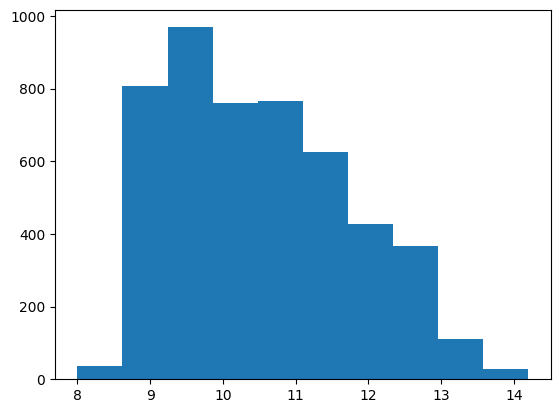

In [36]:
test2=data.copy()
plt.hist(test2['alcohol'].values)

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

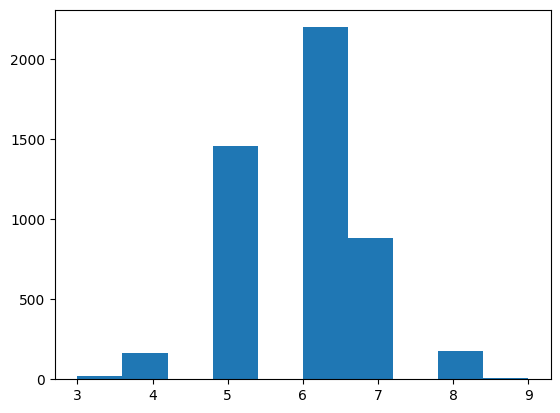

In [37]:
plt.hist(test1['quality'].values)

### Problem 2
Let's classify wines in:
   * good means quality >= 7
   * bad means quality <= 4
   * mediocre means quality five or six
   
Plot histograms of all features for good and bad wines. Which feature is the most discriminative?
   

(array([ 2.,  6., 44., 63., 26., 23., 11.,  6.,  1.,  1.]),
 array([ 4.2 ,  4.96,  5.72,  6.48,  7.24,  8.  ,  8.76,  9.52, 10.28,
        11.04, 11.8 ]),
 <BarContainer object of 10 artists>)

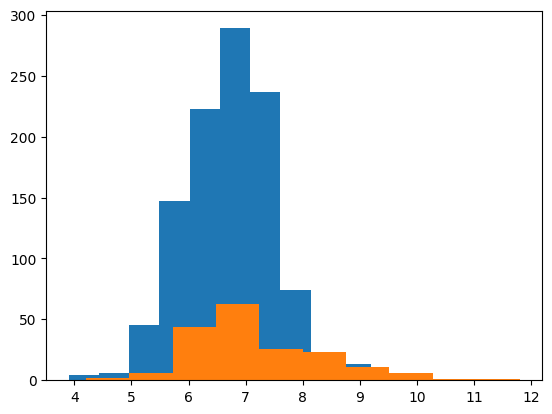

In [72]:
filtered_data_good = data[data['quality'] >= 7]
filtered_data_bad = data[data['quality'] <= 4]
filtered_data_5 = data[data['quality'] == 5]
filtered_data_6 = data[data['quality'] == 6]
#filtered_data_avg = data[data['quality'] >= 5 OR data['quality'] <= 6]
plt.hist(filtered_data_good['fixed acidity'].values)
plt.hist(filtered_data_bad['fixed acidity'].values)

(array([17., 63., 48., 17., 16., 15.,  3.,  0.,  2.,  2.]),
 array([0.11 , 0.209, 0.308, 0.407, 0.506, 0.605, 0.704, 0.803, 0.902,
        1.001, 1.1  ]),
 <BarContainer object of 10 artists>)

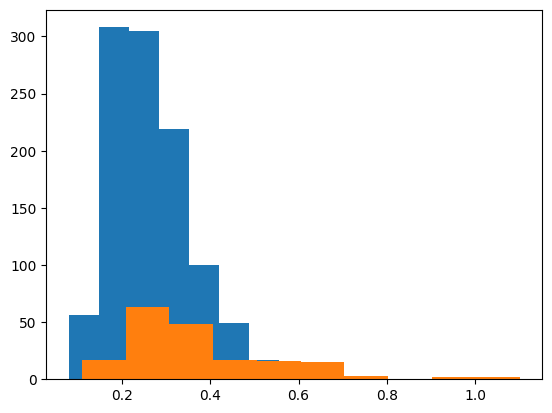

In [45]:
plt.hist(filtered_data_good['volatile acidity'].values)
plt.hist(filtered_data_bad['volatile acidity'].values)

(array([13., 20., 43., 41., 27., 26.,  6.,  3.,  3.,  1.]),
 array([0.   , 0.088, 0.176, 0.264, 0.352, 0.44 , 0.528, 0.616, 0.704,
        0.792, 0.88 ]),
 <BarContainer object of 10 artists>)

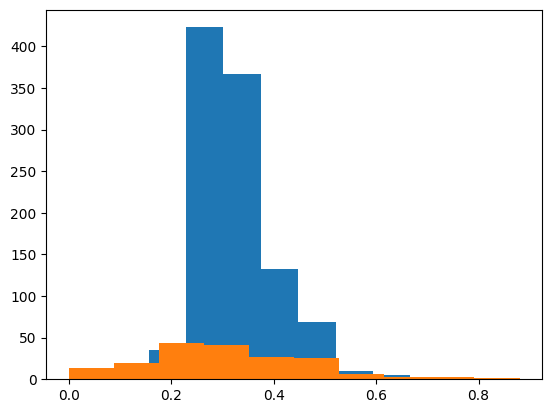

In [46]:
plt.hist(filtered_data_good['citric acid'].values)
plt.hist(filtered_data_bad['citric acid'].values)

(array([86., 17., 22., 12., 10., 14.,  7.,  6.,  7.,  2.]),
 array([ 0.7  ,  2.385,  4.07 ,  5.755,  7.44 ,  9.125, 10.81 , 12.495,
        14.18 , 15.865, 17.55 ]),
 <BarContainer object of 10 artists>)

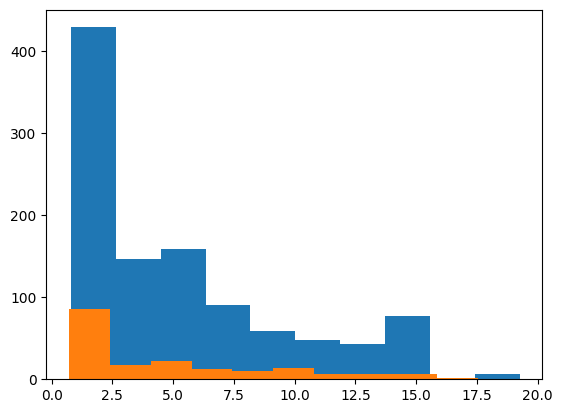

In [47]:
plt.hist(filtered_data_good['residual sugar'].values)
plt.hist(filtered_data_bad['residual sugar'].values)

(array([ 62., 107.,   9.,   1.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([0.013 , 0.0407, 0.0684, 0.0961, 0.1238, 0.1515, 0.1792, 0.2069,
        0.2346, 0.2623, 0.29  ]),
 <BarContainer object of 10 artists>)

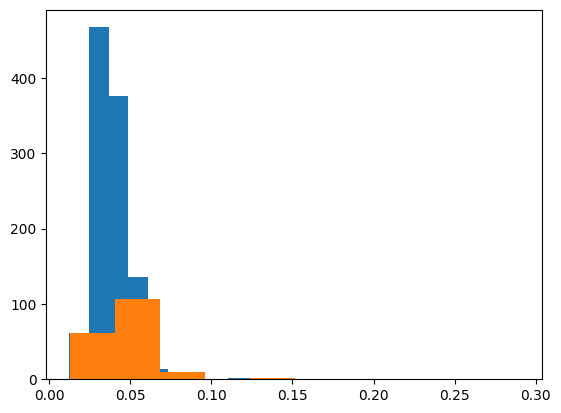

In [48]:
plt.hist(filtered_data_good['chlorides'].values)
plt.hist(filtered_data_bad['chlorides'].values)

(array([133.,  35.,   9.,   0.,   4.,   1.,   0.,   0.,   0.,   1.]),
 array([  3. ,  31.6,  60.2,  88.8, 117.4, 146. , 174.6, 203.2, 231.8,
        260.4, 289. ]),
 <BarContainer object of 10 artists>)

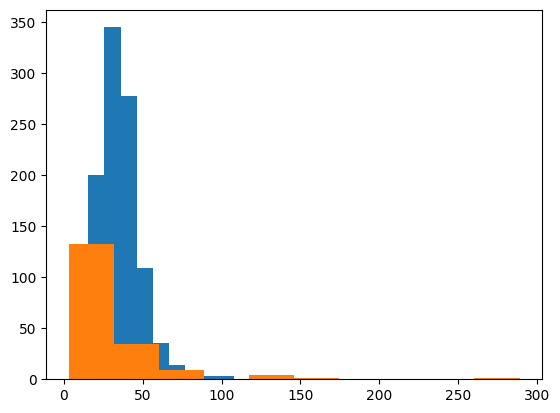

In [49]:
plt.hist(filtered_data_good['free sulfur dioxide'].values)
plt.hist(filtered_data_bad['free sulfur dioxide'].values)

(array([13., 42., 54., 36., 29.,  5.,  2.,  0.,  1.,  1.]),
 array([ 10.,  53.,  96., 139., 182., 225., 268., 311., 354., 397., 440.]),
 <BarContainer object of 10 artists>)

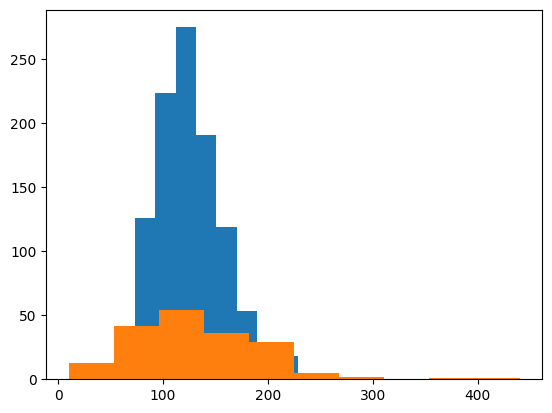

In [50]:
plt.hist(filtered_data_good['total sulfur dioxide'].values)
plt.hist(filtered_data_bad['total sulfur dioxide'].values)

(array([ 7., 20., 18., 31., 31., 29., 15., 16., 11.,  5.]),
 array([0.9892 , 0.99032, 0.99144, 0.99256, 0.99368, 0.9948 , 0.99592,
        0.99704, 0.99816, 0.99928, 1.0004 ]),
 <BarContainer object of 10 artists>)

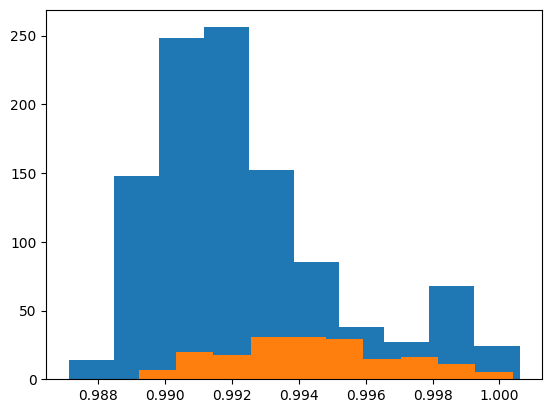

In [51]:
plt.hist(filtered_data_good['density'].values)
plt.hist(filtered_data_bad['density'].values)

(array([ 8., 15., 39., 42., 30., 22., 11., 12.,  2.,  2.]),
 array([2.83 , 2.919, 3.008, 3.097, 3.186, 3.275, 3.364, 3.453, 3.542,
        3.631, 3.72 ]),
 <BarContainer object of 10 artists>)

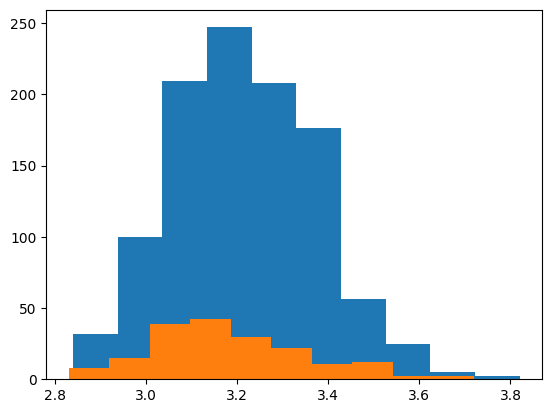

In [52]:
plt.hist(filtered_data_good['pH'].values)
plt.hist(filtered_data_bad['pH'].values)

(array([10., 30., 29., 43., 30., 18., 14.,  5.,  2.,  2.]),
 array([0.25 , 0.312, 0.374, 0.436, 0.498, 0.56 , 0.622, 0.684, 0.746,
        0.808, 0.87 ]),
 <BarContainer object of 10 artists>)

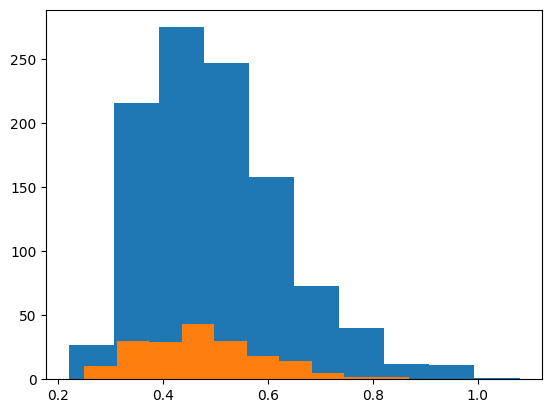

In [54]:
plt.hist(filtered_data_good['sulphates'].values)
plt.hist(filtered_data_bad['sulphates'].values)

(array([ 3., 22., 40., 33., 36., 21., 17.,  3.,  7.,  1.]),
 array([ 8.  ,  8.55,  9.1 ,  9.65, 10.2 , 10.75, 11.3 , 11.85, 12.4 ,
        12.95, 13.5 ]),
 <BarContainer object of 10 artists>)

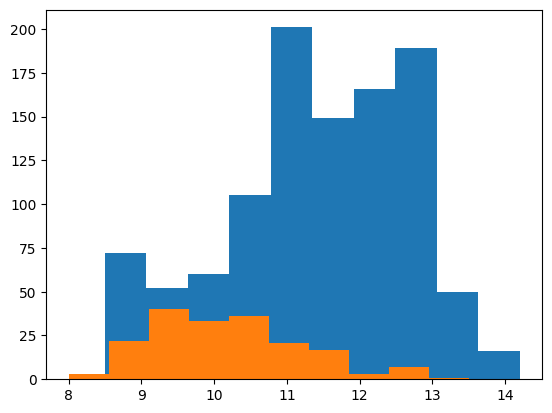

In [55]:
plt.hist(filtered_data_good['alcohol'].values)
plt.hist(filtered_data_bad['alcohol'].values)

(array([ 20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 163.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <BarContainer object of 10 artists>)

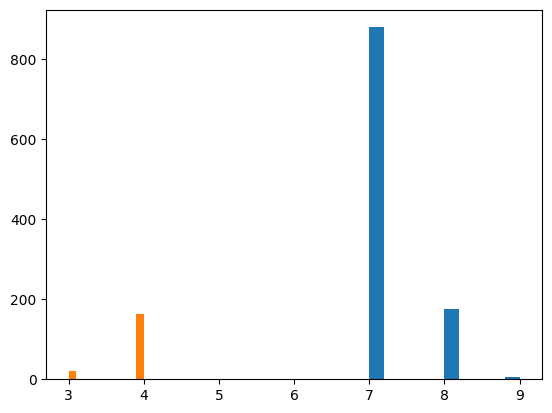

In [56]:
plt.hist(filtered_data_good['quality'].values)
plt.hist(filtered_data_bad['quality'].values)

In [58]:
print("Informal comparison of the graphs gave me the impression that the variables with the greatest discriminating power are: quality, citric acid, residual sugar, density and sulphates. \n Not surprisingly, quality gives the best discrimination.")

Informal comparison of the graphs gave me the impression that the variables with the greatest discriminating power are: quality, citric acid, residual sugar, density and sulphates. 
 Not surprisingly, quality gives the best discrimination.


### Problem 3   
Plot some scatter plots:
   - alcohol vs fixed acidity for good and bad wines, what can we say about good wines?
   - alcohol vs fixed acidity for quality=5 and quality=6
   - alcohol vs density for good and bad wines. What can we conclude?

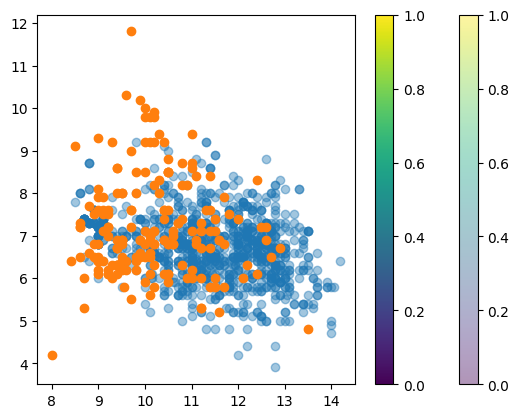

In [64]:
plt.scatter(filtered_data_good['alcohol'].values, filtered_data_good['fixed acidity'].values, alpha=0.42)
plt.colorbar()
plt.scatter(filtered_data_bad['alcohol'].values, filtered_data_bad['fixed acidity'].values, alpha=1)
plt.colorbar()

In [66]:
print("We can observe that better wines tend to have higer values of alcohol content and that they tend to have lower values of fixed acidity.")

We can observe that better wines tend to have higer values of alcohol content and that they tend to have lower values of fixed acidity.


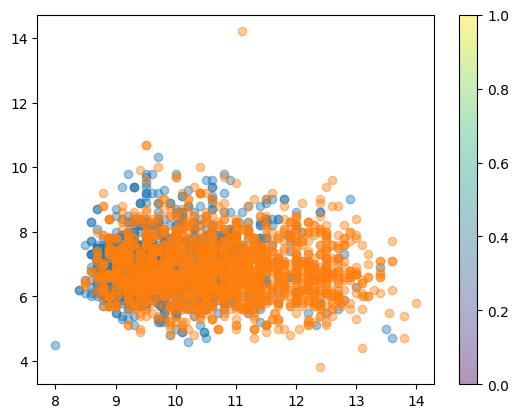

In [76]:
plt.scatter(filtered_data_5['alcohol'].values, filtered_data_5['fixed acidity'].values, alpha=0.42)
plt.scatter(filtered_data_6['alcohol'].values, filtered_data_6['fixed acidity'].values, alpha=0.42)
plt.colorbar()


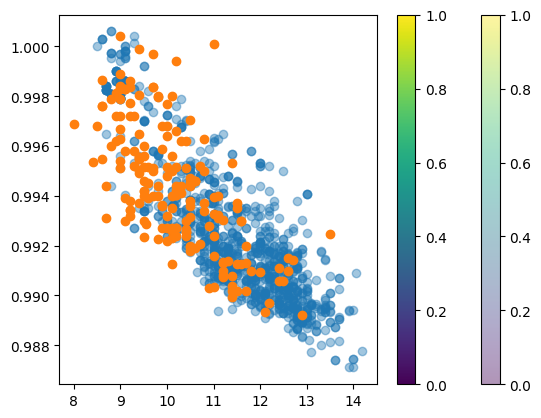

In [67]:
plt.scatter(filtered_data_good['alcohol'].values, filtered_data_good['density'].values, alpha=0.42)
plt.colorbar()
plt.scatter(filtered_data_bad['alcohol'].values, filtered_data_bad['density'].values, alpha=1)
plt.colorbar()

In [69]:
print("Althugh overlapping in significant margin, we can notice that better wines tend to have higher vales of alcohol content and lower values of density. The opposite is true for lower quality ones. ")

Althugh overlapping in significant margin, we can notice that better wines tend to have higher vales of alcohol content and lower values of density. The opposite is true for lower quality ones. 


# References 
1. [matplotlib gallery](http://matplotlib.org/gallery.html)
2. [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
    * almost any question about these tools is already answered on stackoverflow